# Retail Sales Prediction - Placement Project

### Problem Statement : 

- XYZ operates over 3,000 drug stores in 7 countries. XYZ store managers are currently tasked with predicting their daily sales   up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school, and state     holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique               circumstances, the accuracy of results can be quite varied.
- You are provided with historical sales data for 1,115 XYZ stores. The task is to forecast the "Sales" column for the test set.   Note that some stores in the dataset were temporarily closed for refurbishment.


### Importing necessary libraries :

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
import datetime
warnings.filterwarnings('ignore')
%matplotlib inline

### Loading datasets :

In [4]:
df_sales = pd.read_csv('Salesdata.csv')
df_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1


In [5]:
df_store = pd.read_csv('store.csv')
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Basic Investigation of datasets:

### Understanding Sales dataset :

In [6]:
# checking the shape of the data

df_sales.shape                           # 1017209 rows and 9 columns

(1017209, 9)

In [7]:
# Checking datatypes

df_sales.info()                         # Except for Date and StateHoliday column all the others are of numeric datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
# Converting Date column to Datetime format and adding Day, Month, Year, Week and Quarter columns

df1_sales = df_sales.copy()   # Making a copy

df1_sales['Date'] = pd.to_datetime(df1_sales['Date'])

df1_sales['Day_Year'] = df1_sales['Date'].dt.day
df1_sales['Month_Year'] = df1_sales['Date'].dt.month
df1_sales['Year'] = df1_sales['Date'].dt.year
df1_sales['Week_Year'] = df1_sales['Date'].dt.week

df1_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day_Year,Month_Year,Year,Week_Year
0,1,5,2015-07-31,5263,555,1,1,0,1,31,7,2015,31
1,2,5,2015-07-31,6064,625,1,1,0,1,31,7,2015,31
2,3,5,2015-07-31,8314,821,1,1,0,1,31,7,2015,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,31,7,2015,31
4,5,5,2015-07-31,4822,559,1,1,0,1,31,7,2015,31


In [9]:
# Understanding the descriptive statistics

round(df1_sales.describe(),2)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Day_Year,Month_Year,Year,Week_Year
count,1017209.00,1017209.0,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.0,5773.82,633.15,0.83,0.38,0.18,15.43,6.12,2013.83,24.75
std,321.91,2.0,3849.93,464.41,0.38,0.49,0.38,9.05,3.39,0.78,14.64
min,1.00,1.0,0.00,0.00,0.00,0.00,0.00,1.00,1.00,2013.00,1.00
25%,280.00,2.0,3727.00,405.00,1.00,0.00,0.00,7.00,3.00,2013.00,12.00
50%,558.00,4.0,5744.00,609.00,1.00,0.00,0.00,16.00,6.00,2014.00,24.00
75%,838.00,6.0,7856.00,837.00,1.00,1.00,0.00,23.00,9.00,2014.00,37.00
max,1115.00,7.0,41551.00,7388.00,1.00,1.00,1.00,31.00,12.00,2015.00,52.00


In [10]:
# checking for missing values

df1_sales.isnull().sum()                   # There are no missing values in the dataset

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Day_Year         0
Month_Year       0
Year             0
Week_Year        0
dtype: int64

In [11]:
# checking for duplicates

df1_sales.duplicated().sum()                # There are no duplicate values

0

In [12]:
# dates for which the store is closed or sales is 0

df1_sales[(df1_sales['Open'] == 0)|(df1_sales['Sales'] == 0)]      

# There are 172871 rows( or dates) for which the store is closed and for all those dates the sales is 0

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day_Year,Month_Year,Year,Week_Year
291,292,5,2015-07-31,0,0,0,1,0,1,31,7,2015,31
875,876,5,2015-07-31,0,0,0,1,0,1,31,7,2015,31
1406,292,4,2015-07-30,0,0,0,1,0,1,30,7,2015,31
1990,876,4,2015-07-30,0,0,0,1,0,1,30,7,2015,31
2521,292,3,2015-07-29,0,0,0,1,0,1,29,7,2015,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,1,1,2013,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,1,1,2013,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,1,1,2013,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,1,1,2013,1


### Understanding stores dataset :

In [13]:
# Checking the shape

df_store.shape                            # There are 1115 rows and 10 columns

(1115, 10)

In [14]:
# Checking the datatypes

df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [15]:
# Checking the descriptive statistics of the data:

df_store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [16]:
# Checking for duplicates

df_store.duplicated().sum()            # There are no duplicates in the dataset

0

In [17]:
# Checking for missing value :

df_store.isnull().sum()/len(df_store)*100

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

In [18]:
# Creating a copy of the dataset :

df1_store = df_store.copy()

In [19]:
# Treating the missing values:

# As there is a considerable percentage of missing value in the variables, The deletion of missing values will cause data loss
# Hence the missing values are to be imputed

# Imputing missing values with median of values for variables 'CompetitonDistance', 'CompetitionOpenSinceMonth' and 
#'CompetitionSinceYear' as Month, Year and Distance cannot have 0 as value

df1_store['CompetitionDistance'].fillna(df1_store['CompetitionDistance'].median(),inplace = True)
df1_store['CompetitionOpenSinceMonth'].fillna(df1_store['CompetitionOpenSinceMonth'].median(), inplace = True)
df1_store['CompetitionOpenSinceYear'].fillna(df1_store['CompetitionOpenSinceYear'].median(), inplace = True)

In [20]:
df1_store[df1_store['Promo2']==0][['Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']]

# The below displayed df has 544 rows which matches with the missing values for variables Promo2SinceWeek, Promo2SinceYear and
# PromoInterval. Wherever promo2 is 0 these variables has missing values, so let's assume there is no promos associated with it

,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,NaN,NaN,NaN
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN
5,0,NaN,NaN,NaN
6,0,NaN,NaN,NaN
...,...,...,...,...
1107,0,NaN,NaN,NaN
1109,0,NaN,NaN,NaN
1111,0,NaN,NaN,NaN
1112,0,NaN,NaN,NaN


In [21]:
# Imputing Promo2SinceWeek and Promo2SinceYear by filling it with 0

df1_store['Promo2SinceWeek'].fillna(0, inplace = True)
df1_store['Promo2SinceYear'].fillna(0, inplace = True)

# since promointerval is a categorical variable merely indicating the interval between promos and has about 48% of missing data
# and We are not having any info about the interval months promointerval column can be dropped
df1_store = df1_store.drop(['PromoInterval'], axis = 1)

In [22]:
df1_store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
dtype: int64

## Exploratory Data Analysis [ EDA]

### Joining the Sales and Store dataset

In [233]:
df1_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day_Year,Month_Year,Year,Week_Year
0,1,5,2015-07-31,5263,555,1,1,0,1,31,7,2015,31
1,2,5,2015-07-31,6064,625,1,1,0,1,31,7,2015,31
2,3,5,2015-07-31,8314,821,1,1,0,1,31,7,2015,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,31,7,2015,31
4,5,5,2015-07-31,4822,559,1,1,0,1,31,7,2015,31


In [234]:
df1_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0


In [235]:
df1_Joined_sales = pd.merge(df1_sales, df1_store, on = 'Store', how = 'left')
df1_Joined_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day_Year,...,Year,Week_Year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,5,2015-07-31,5263,555,1,1,0,1,31,...,2015,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0
1,2,5,2015-07-31,6064,625,1,1,0,1,31,...,2015,31,a,a,570.0,11.0,2007.0,1,13.0,2010.0
2,3,5,2015-07-31,8314,821,1,1,0,1,31,...,2015,31,a,a,14130.0,12.0,2006.0,1,14.0,2011.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,31,...,2015,31,c,c,620.0,9.0,2009.0,0,0.0,0.0
4,5,5,2015-07-31,4822,559,1,1,0,1,31,...,2015,31,a,a,29910.0,4.0,2015.0,0,0.0,0.0


In [236]:
# Selecting only stores with sales above 0 and stores that are open

df1_sales_store_open = df1_Joined_sales[(df1_Joined_sales['Open']!=0)|(df1_Joined_sales['Sales']!=0)]
df1_sales_store_open.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day_Year,...,Year,Week_Year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,5,2015-07-31,5263,555,1,1,0,1,31,...,2015,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0
1,2,5,2015-07-31,6064,625,1,1,0,1,31,...,2015,31,a,a,570.0,11.0,2007.0,1,13.0,2010.0
2,3,5,2015-07-31,8314,821,1,1,0,1,31,...,2015,31,a,a,14130.0,12.0,2006.0,1,14.0,2011.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,31,...,2015,31,c,c,620.0,9.0,2009.0,0,0.0,0.0
4,5,5,2015-07-31,4822,559,1,1,0,1,31,...,2015,31,a,a,29910.0,4.0,2015.0,0,0.0,0.0


In [237]:
df1_sales_store_open.shape

(844392, 21)

In [238]:
round(df1_sales_store_open.describe(),2)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Day_Year,Month_Year,Year,Week_Year,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,844392.00,844392.00,844392.00,844392.00,844392.0,844392.00,844392.00,844392.00,844392.00,844392.00,844392.00,844392.00,844392.00,844392.00,844392.0,844392.00,844392.00
mean,558.42,3.52,6955.51,762.73,1.0,0.45,0.19,15.53,6.15,2013.83,24.91,5449.87,7.47,2009.11,0.5,11.60,1003.23
std,321.73,1.72,3104.21,401.23,0.0,0.50,0.40,9.00,3.37,0.78,14.52,7800.95,2.68,4.97,0.5,15.31,1005.87
min,1.00,1.00,0.00,0.00,1.0,0.00,0.00,1.00,1.00,2013.00,1.00,20.00,1.00,1900.00,0.0,0.00,0.00
25%,280.00,2.00,4859.00,519.00,1.0,0.00,0.00,7.00,3.00,2013.00,12.00,710.00,6.00,2008.00,0.0,0.00,0.00
50%,558.00,3.00,6369.00,676.00,1.0,0.00,0.00,16.00,6.00,2014.00,24.00,2325.00,8.00,2010.00,0.0,0.00,0.00
75%,837.00,5.00,8360.00,893.00,1.0,1.00,0.00,23.00,9.00,2014.00,37.00,6880.00,9.00,2011.00,1.0,22.00,2012.00
max,1115.00,7.00,41551.00,7388.00,1.0,1.00,1.00,31.00,12.00,2015.00,52.00,75860.00,12.00,2015.00,1.0,50.00,2015.00


In [239]:
df1_sales_store_open.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Open                       844392 non-null  int64         
 6   Promo                      844392 non-null  int64         
 7   StateHoliday               844392 non-null  object        
 8   SchoolHoliday              844392 non-null  int64         
 9   Day_Year                   844392 non-null  int64         
 10  Month_Year                 844392 non-null  int64         
 11  Year                       844392 non-null  int64  

In [240]:
variables = list(df1_sales_store_open.columns)
print(variables)

['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Day_Year', 'Month_Year', 'Year', 'Week_Year', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']


In [241]:
categorical_variables = []
numerical_variables = []

for i in variables:
    if len(df1_sales_store_open[i].unique())<=7:
        categorical_variables.append(i)
    else:
        numerical_variables.append(i)

print(f'Categorical Variables : {categorical_variables}')
print('***************************************************')
print(f'Numerical_Variables : {numerical_variables}')

Categorical Variables : ['DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'StoreType', 'Assortment', 'Promo2']
***************************************************
Numerical_Variables : ['Store', 'Date', 'Sales', 'Customers', 'Day_Year', 'Month_Year', 'Week_Year', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']


### Analysing and Visualizing Independent Variables

### Storetype and Assortment vs sales

In [242]:
data_storeType = df1_sales_store_open.groupby('StoreType')[['Sales']].sum().sort_values('Sales', ascending = False).reset_index()

In [243]:
data_asstmnt = df1_sales_store_open.groupby('Assortment')[['Sales']].sum().sort_values('Sales', ascending = False).reset_index()

In [244]:
data_sa = df1_sales_store_open.groupby(['StoreType','Assortment'])[['Sales']].sum().sort_values('Sales', ascending = False).reset_index()

In [245]:
def multi_plot(x_var, y_var, data):
    ax1 = sns.barplot(x = x_var, y=y_var, data = data)
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    for container in ax1.containers:
        ax1.bar_label(container, fmt = '%.2f')
        plt.xticks(rotation = 30)

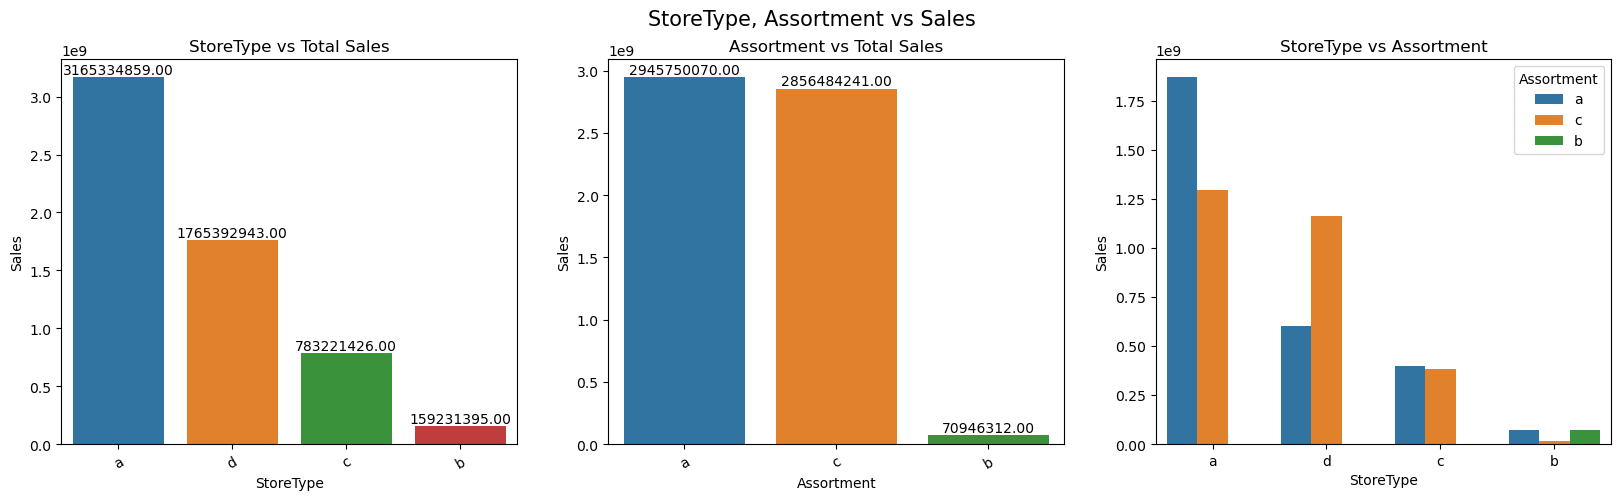

In [246]:
plt.figure(figsize = (20,5))
plt.suptitle("StoreType, Assortment vs Sales",size = 15)

plt.subplot(1,3,1)
multi_plot('StoreType','Sales', data_storeType)
plt.title("StoreType vs Total Sales")

plt.subplot(1,3,2)
multi_plot('Assortment','Sales', data_asstmnt)
plt.title("Assortment vs Total Sales")

plt.subplot(1,3,3)
sns.barplot(x = 'StoreType', y = 'Sales', data = data_sa, hue = 'Assortment')
plt.title("StoreType vs Assortment")
plt.savefig('Store_Assortment.jpg')

- Inference: 
  - store type a has maximum and b has minimum sales
  - Assortment type a has maximum sales as compared to other two types
  - Assortment type b is sold only by store type b
               

In [247]:
df1_sales_store_open['StateHoliday'] = df1_sales_store_open['StateHoliday'].map({0:0,"0":0,"a":1,"b":1,"c":1})

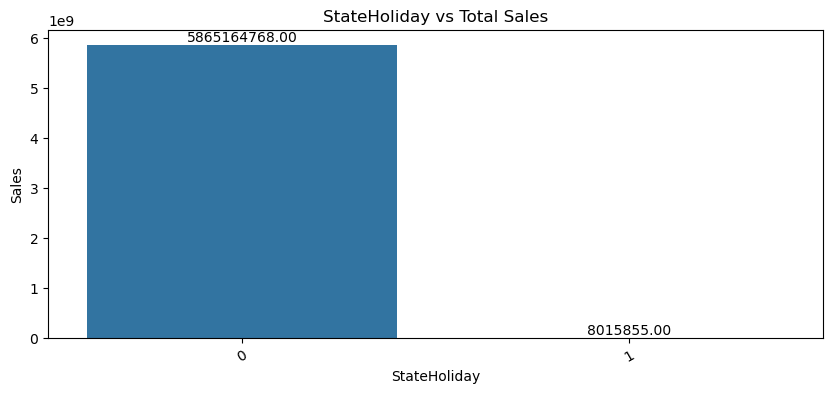

In [248]:
data_sh = df1_sales_store_open.groupby('StateHoliday')[['Sales']].sum().sort_values('Sales', ascending = False).reset_index()
plt.figure(figsize = (10,4))
multi_plot('StateHoliday','Sales', data_sh)
plt.title("StateHoliday vs Total Sales")

plt.savefig('StateHoliday.jpg')
plt.show()

- Inference:
  - 0 indicates 'None' i.e not a state Holiday and other 3 categories indicates public holiday, easter holiday and christamas
    which all comes under stateholiday, since most of the shops are closed during state holiday, sales is higher for days other 
    than state holiday

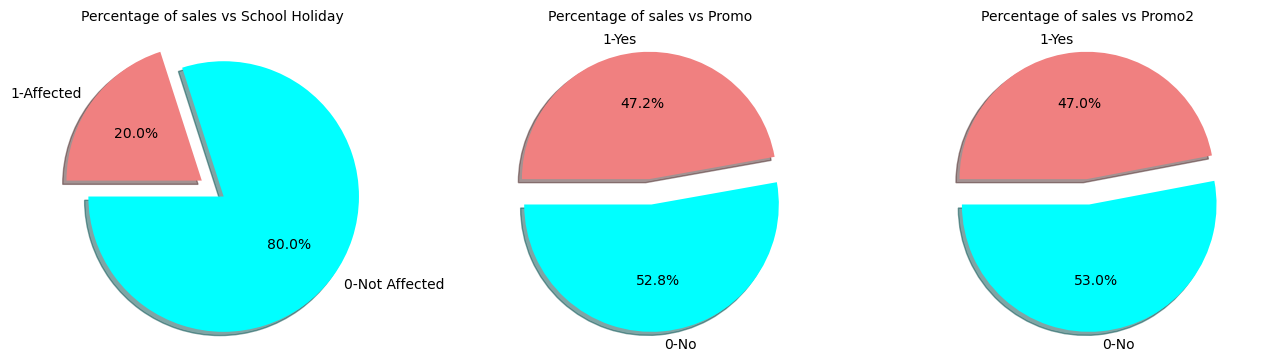

In [204]:
plt.figure(figsize = (16,4))

plt.subplot(1,3,1)
labels = ['0-Not Affected', '1-Affected']
sizes = [4696260531,1176920092]
colors = ['cyan','lightcoral']
explode = (0.1, 0.1,)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.title("Percentage of sales vs School Holiday", fontsize=10, y=1.03)
plt.axis('equal');

plt.subplot(1,3,2)
labels = ['0-No', '1-Yes']
sizes = [3101206286,2771974337]
colors = ['cyan','lightcoral']
explode = (0.1, 0.1,)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.title("Percentage of sales vs Promo", fontsize=10, y=1.03)
plt.axis('equal');

plt.subplot(1,3,3)
labels = ['0-No', '1-Yes']
sizes = [3111542628,2761637995]
colors = ['cyan','lightcoral']
explode = (0.1, 0.1,)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.title("Percentage of sales vs Promo2", fontsize=10, y=1.03)
plt.axis('equal');
plt.savefig('SchoolHoliday_promo.jpg')

- Inference
  - Majority of Sales is not affected by school holiday
  - Sales are higher when any type of promo is going on

### Day Of Week vs Promo and Sales

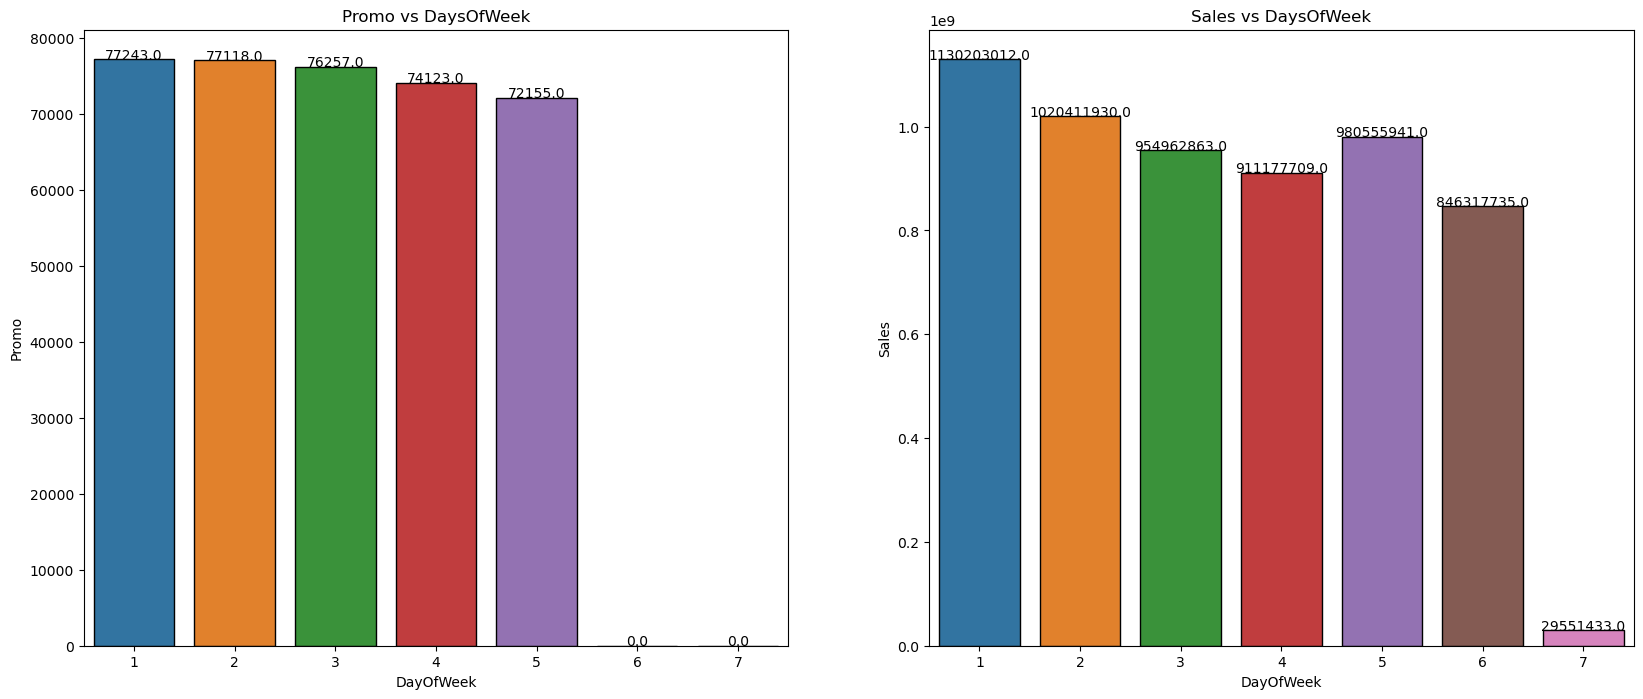

In [205]:
data_dayofweek = df1_sales_store_open.groupby(['DayOfWeek'])[['Sales','Promo']].sum().sort_values('Sales', ascending = False).reset_index()
l1 = ['Promo','Sales']

fig  = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
for i in range(len(l1)):
    plt.subplot(1,2,i+1)
    ax = sns.barplot(x='DayOfWeek', y=l1[i], data=data_dayofweek, edgecolor='black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2,rect.get_height() + 2, rect.get_height(),
                horizontalalignment='center')
        title = l1[i] +" " 'vs DaysOfWeek'
        plt.title(title);
        
plt.savefig('Dayof_Week.jpg')

- Inference
  - Most Promos are on Monday's and Tuesday's, hence sales are also high on Monday's and Tuesday's
  - There is no Promo on Saturday's and Sunday's which might be a factor contributing to low sales on these days

### Month_Year vs Total Sales

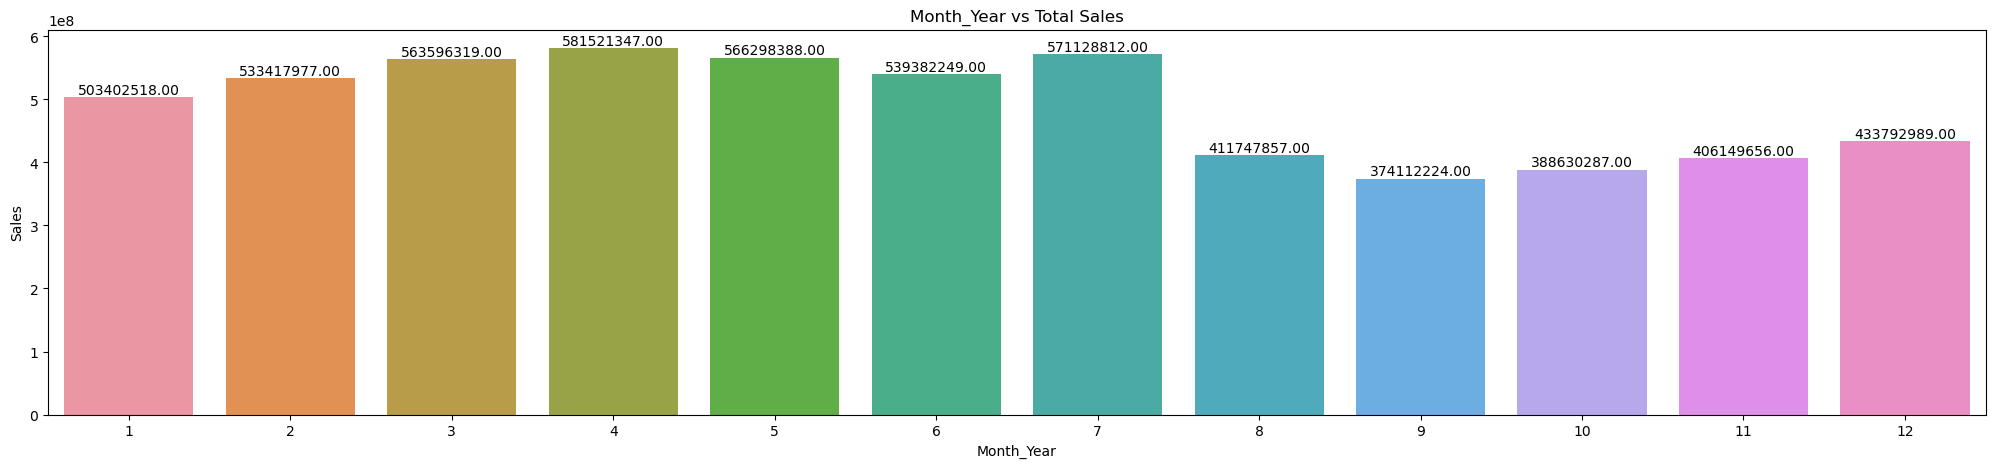

In [206]:
data_month = df1_sales_store_open.groupby(['Month_Year'])[['Sales']].sum().reset_index()
plt.figure(figsize = (25,5))
ax1 = sns.barplot(x = 'Month_Year', y = 'Sales', data = data_month)
for container in ax1.containers:
        ax1.bar_label(container, fmt = '%.2f')

plt.title("Month_Year vs Total Sales")
plt.savefig('Month.jpg')

- Inference : Total Sales is maximum in the month of April

### Week_Year vs Sales

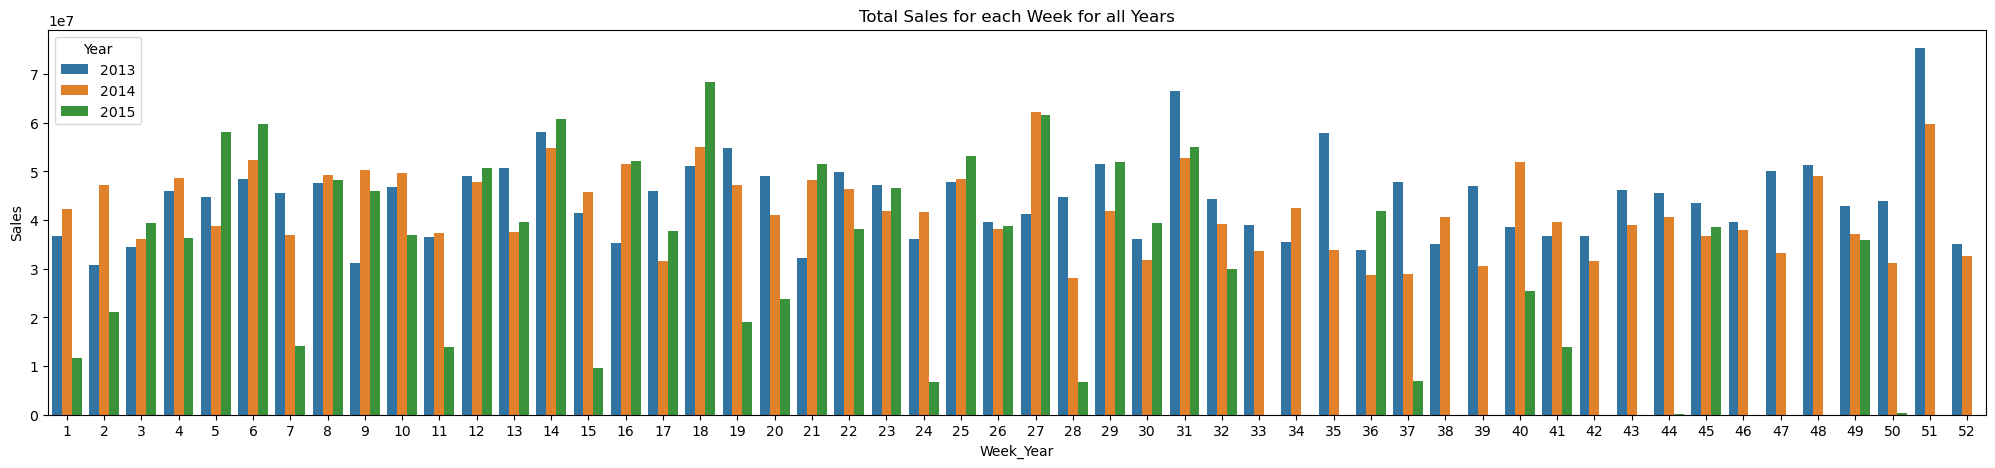

In [207]:
data_week_year = df1_sales_store_open.groupby(['Year','Week_Year'])[['Sales']].sum().reset_index()
plt.figure(figsize = (25,5))
sns.barplot(x = 'Week_Year', y = 'Sales', data = data_week_year, hue = 'Year')
plt.title("Total Sales for each Week for all Years")
plt.savefig('Week.jpg')

In [209]:
def multi_plot(x_var, y_var, data):
    ax1 = sns.barplot(x = x_var, y=y_var, data = data)
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.xticks(rotation = 30)

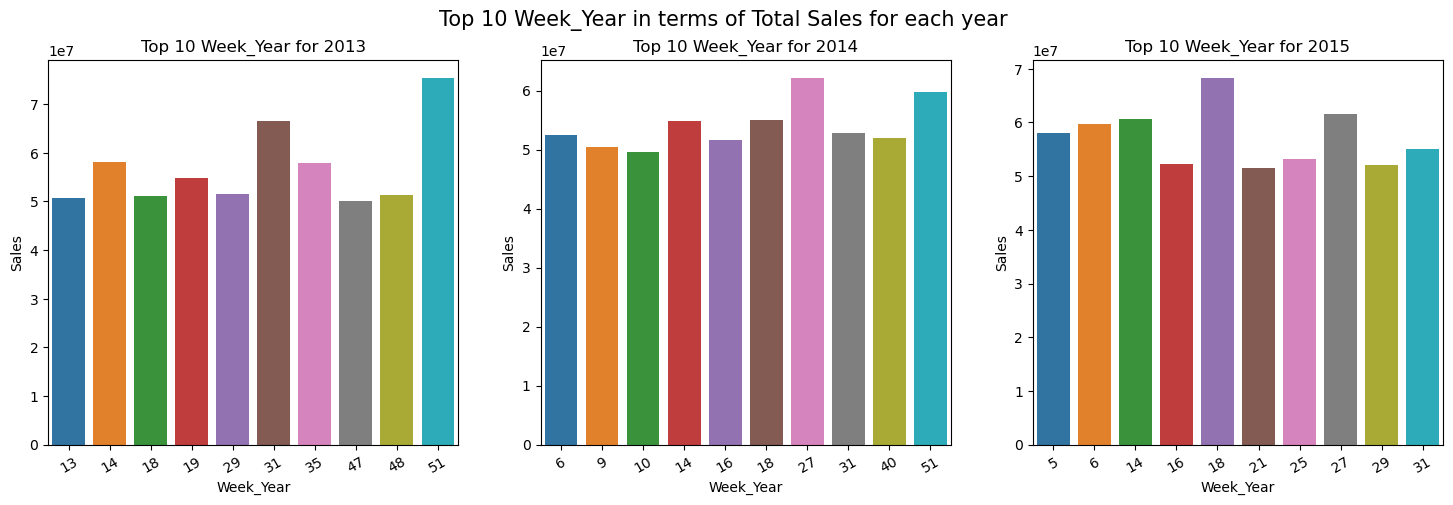

In [210]:
Filter_13 = df1_sales_store_open['Year'] == 2013
data_2013 = df1_sales_store_open[Filter_13].groupby(['Week_Year'])[['Sales']].sum().sort_values('Sales', ascending = False).reset_index().head(10)

Filter_14 = df1_sales_store_open['Year'] == 2014
data_2014 = df1_sales_store_open[Filter_14].groupby(['Week_Year'])[['Sales']].sum().sort_values('Sales', ascending = False).reset_index().head(10)

Filter_15 = df1_sales_store_open['Year'] == 2015
data_2015 = df1_sales_store_open[Filter_15].groupby(['Week_Year'])[['Sales']].sum().sort_values('Sales', ascending = False).reset_index().head(10)

plt.figure(figsize = (18,5))
plt.suptitle("Top 10 Week_Year in terms of Total Sales for each year",size = 15)

plt.subplot(1,3,1)
multi_plot('Week_Year','Sales', data_2013)
plt.title("Top 10 Week_Year for 2013")

plt.subplot(1,3,2)
multi_plot('Week_Year','Sales', data_2014)
plt.title("Top 10 Week_Year for 2014")

plt.subplot(1,3,3)
multi_plot('Week_Year','Sales', data_2015)
plt.title("Top 10 Week_Year for 2015")

plt.savefig('Week_Yearwise.jpg')

- Inference:
  - For the Year 2015 sales data upto week 40 only is available
  - Considering the previous two years Sales, is higher during week 51 which comes in the christmas season.
  - If this pattern follows then for sales might be higher for the 51st week for the year 2015

### Yearwise Sales Distribution

In [45]:
df1_sales_store_open.groupby('Year')[['Sales']].agg(['sum','mean','count'])

Sales                     
             sum         mean   count
Year                                 
2013  2302876084  6814.392025  337943
2014  2180804896  7025.404201  310417
2015  1389499643  7088.126648  196032

- Inference:
  - Sum of Sales is higher for the Year 2013 while Average Sales is higher for 2015

### Average sales in each year

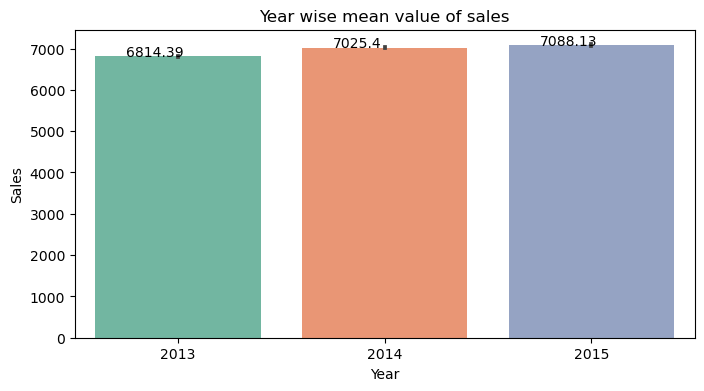

In [230]:
plt.figure(figsize = (8,4))
ax = sns.barplot(x = 'Year', y = 'Sales', data = df1_sales_store_open, estimator = 'mean', palette = 'Set2')
for patch in ax.patches:
    value =round(patch.get_height(),2)
    x = patch.get_x() + 0.15
    y = value
    
    plt.annotate(value, (x, y))
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Year wise mean value of sales")

plt.savefig('Year_Sales.jpg')
plt.show()

### Customer Footfall vs Sales

<Figure size 1200x400 with 0 Axes>

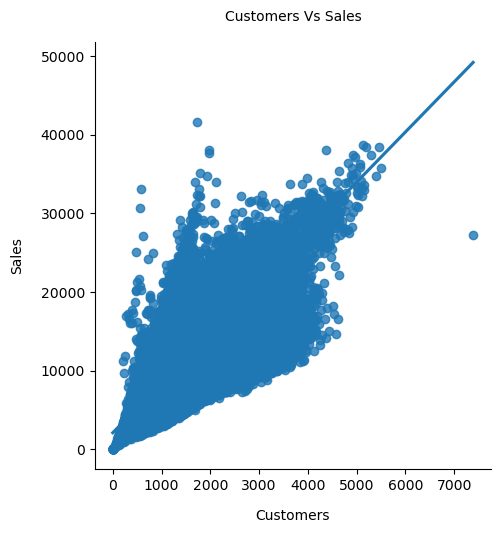

In [212]:
plt.figure(figsize=(12,4))
sns.lmplot(x="Customers", y="Sales", palette="Greens", data=df1_sales_store_open)
plt.title("Customers Vs Sales", fontsize=10, y=1.03)
plt.xlabel("Customers", fontsize=10, labelpad=12)
plt.ylabel("Sales", fontsize=10, labelpad=12)
plt.savefig('Customers.jpg')

- Inference:
    - Customer variable has a linear relationship with sales
    - As no of customers increases sales also increases

### CompetitionDistance Vs Sales

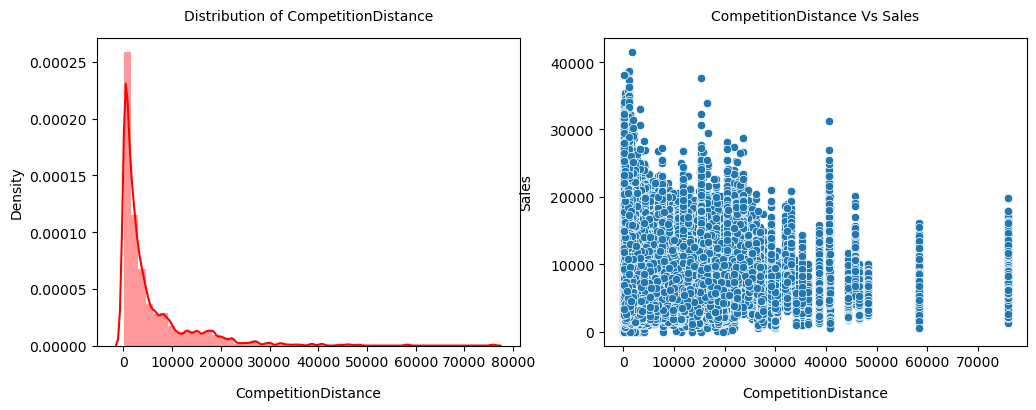

In [213]:
f = plt.figure(figsize=(12,4))
f.add_subplot(121)
sns.distplot(df1_sales_store_open['CompetitionDistance'], bins = 50, color = 'r')
plt.title("Distribution of CompetitionDistance", fontsize=10, y=1.03)
plt.xlabel("CompetitionDistance", fontsize=10, labelpad=12)

f.add_subplot(122)
sns.scatterplot(x="CompetitionDistance", y="Sales", palette="Greens", data=df1_sales_store_open)
plt.title("CompetitionDistance Vs Sales", fontsize=10, y=1.03)
plt.xlabel("CompetitionDistance", fontsize=10, labelpad=12)
plt.ylabel("Sales", fontsize=10, labelpad=12)

plt.savefig('Competition_Distance.jpg')

- Inference :
  - distribution of Competition Distance indicates presence of outliers
  - Competition Distance do no to have linear relationship with sales,
  - hence the variabel alone can't have an effect on sales, might be useful when considered along with other variables
    like type of stores, when competition distance between two stores are considered or type of products sold etc...

### Top 5 stores in terms of Avg Sales for each Year

In [215]:
def multi_plot(x_var, y_var, data):
    ax1 = sns.barplot(x = x_var, y=y_var, data = data)
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    for container in ax1.containers:
        ax1.bar_label(container, fmt = '%.2f')
        plt.xticks(rotation = 30)

In [216]:
Filter = df1_sales_store_open['Year'] == 2013
d1 = df1_sales_store_open[Filter].groupby(['Store'])[['Sales']].mean().sort_values('Sales', ascending = False).reset_index().head(5)

In [217]:
Filter = df1_sales_store_open['Year'] == 2014
d2 = df1_sales_store_open[Filter].groupby(['Store'])[['Sales']].mean().sort_values('Sales', ascending = False).reset_index().head(5)

In [218]:
Filter = df1_sales_store_open['Year'] == 2015
d3 = df1_sales_store_open[Filter].groupby(['Store'])[['Sales']].mean().sort_values('Sales', ascending = False).reset_index().head(5)

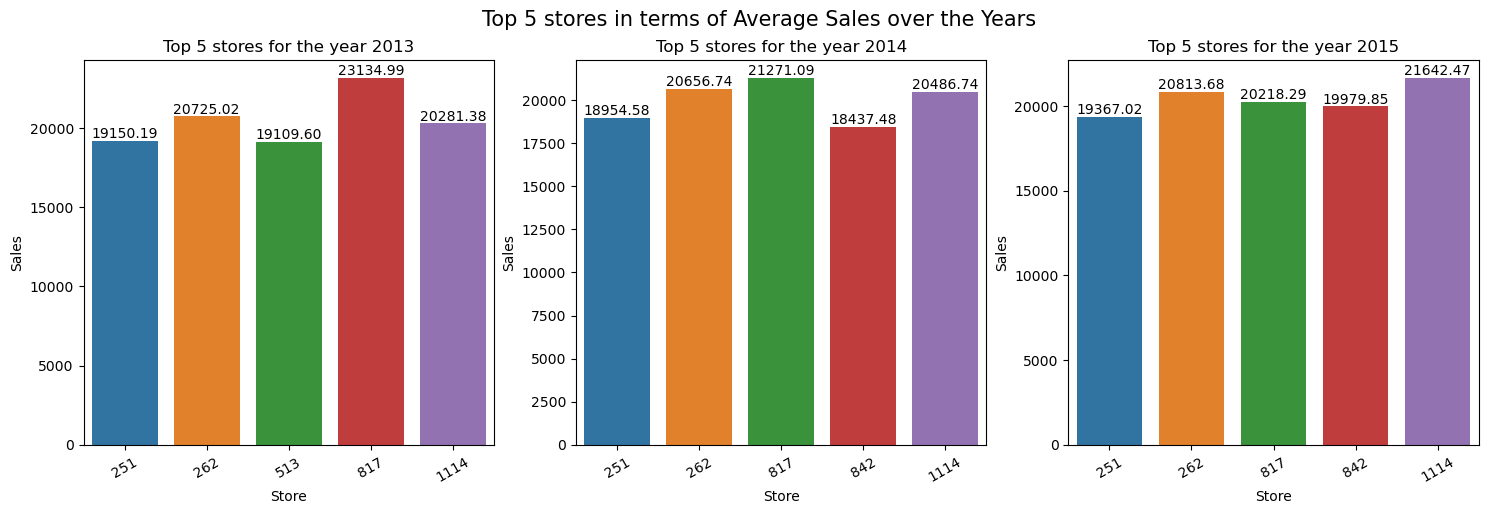

In [219]:
plt.figure(figsize = (18,5))
plt.suptitle("Top 5 stores in terms of Average Sales over the Years",size = 15)

plt.subplot(1,3,1)
multi_plot('Store','Sales', d1)
plt.title("Top 5 stores for the year 2013")

plt.subplot(1,3,2)
multi_plot('Store','Sales', d2)
plt.title("Top 5 stores for the year 2014")

plt.subplot(1,3,3)
multi_plot('Store','Sales', d3)
plt.title("Top 5 stores for the year 2015")

plt.savefig('Top_stores.jpg')

- Inference :
  - Over the Years the TOP 5 stores in terms of Average sales are almost the same

### Store Vs Average Sales

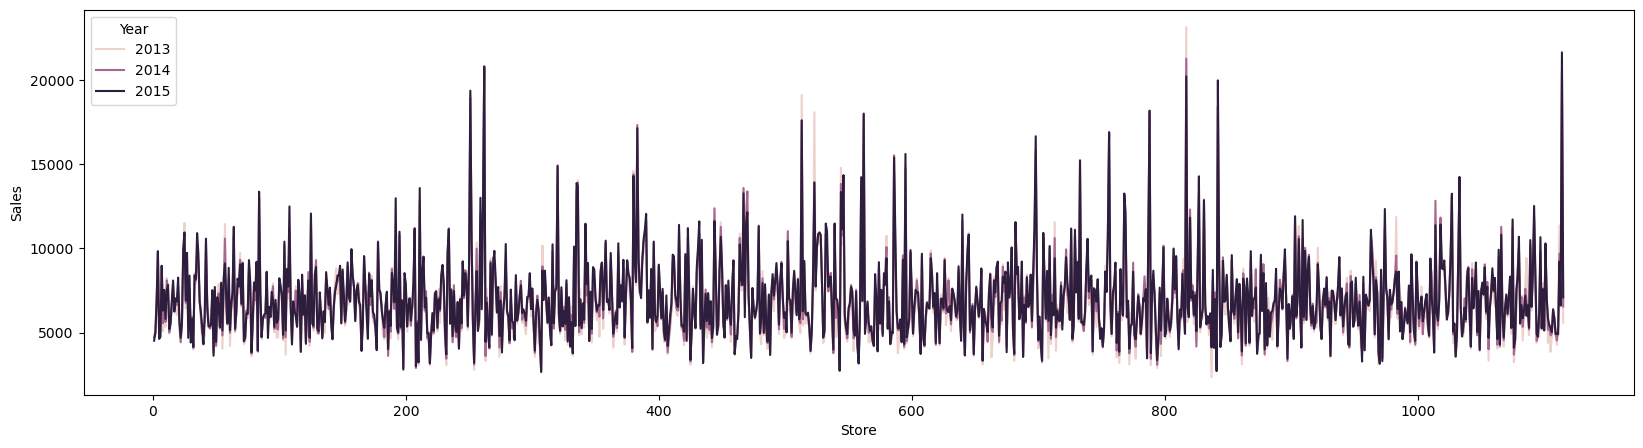

In [229]:
data = df1_sales_store_open.groupby(['Year','Store'])[['Sales']].mean().reset_index()
plt.figure(figsize =(20,5))
sns.lineplot(data = data, x = 'Store', y = 'Sales', hue = 'Year')

plt.savefig('Store_Avgsales.jpg')
plt.show()

### Distribution of continuous numerical features

In [227]:
list_num = ['Sales','Customers','CompetitionDistance']

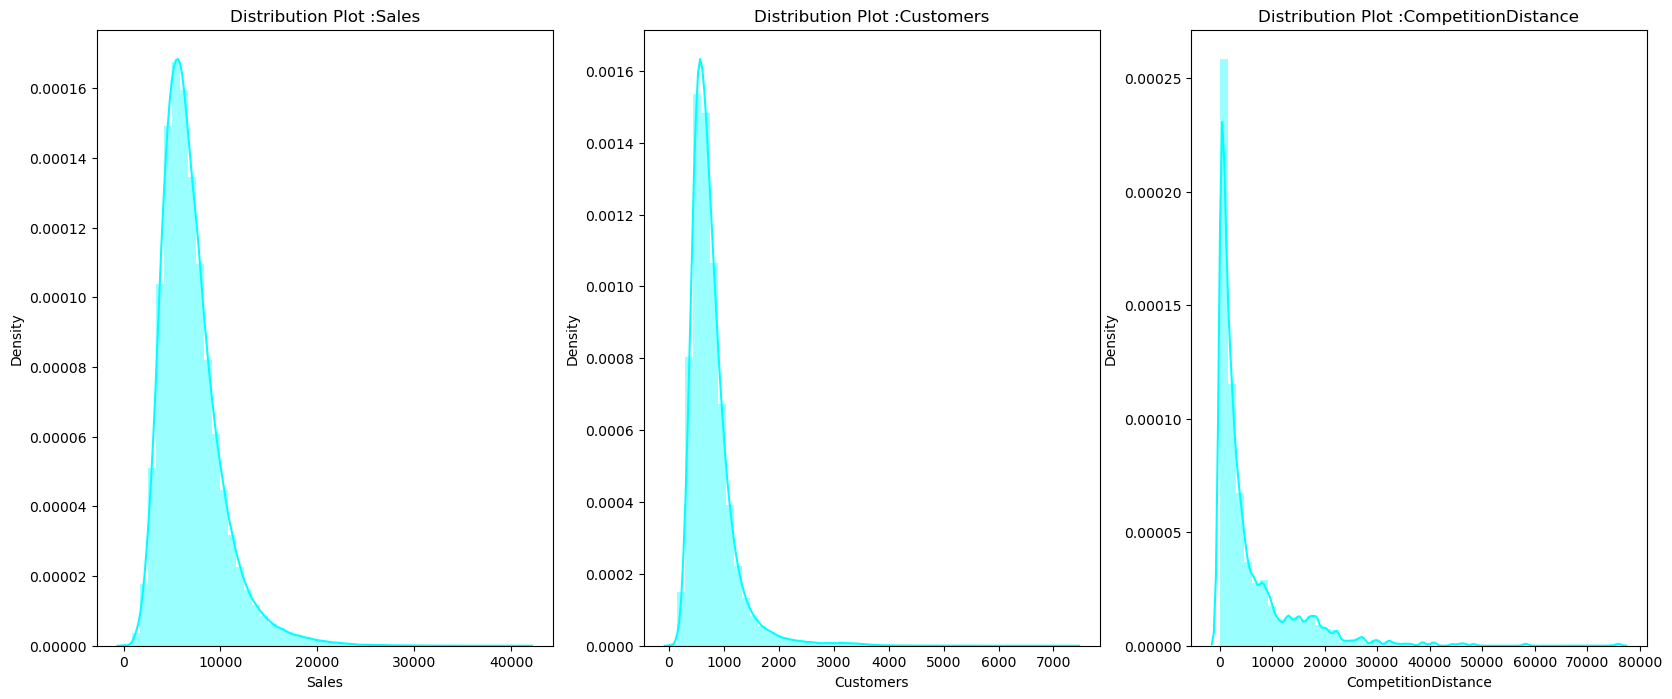

In [228]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
for i in range(len(list_num)):
    plt.subplot(1,3,i+1)
    sns.distplot(df1_sales_store_open[list_num[i]], color= colors[0])
    title = 'Distribution Plot :' + list_num[i]
    plt.title(title)
    
plt.savefig('Distribution.jpg')  
plt.show()


- Inference :
    - Both sales and customer distributions are normal distributions are right skewed
    - This indicates some unusually high values at the tail end

### Visualising and Treating Outliers

In [223]:
# selecting all variabels with datatype other than 'object' and 'datetime' for visulaising outliers

list_outcheck = df1_sales_store_open.select_dtypes(exclude = ['object','datetime64']).columns[0: ]
list_outcheck

# However variables like 'Store','DayOfWeek','Open','Promo','SchoolHoliday','Day_Year','Month_Year','Year','Week_Year',Promo2'
# 'Promo2SinceWeek','Promo2SinceYear' are of categorical nature even if they have numerical datatype

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Day_Year', 'Month_Year', 'Year',
       'Week_Year', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear'],
      dtype='object')

In [224]:
# Selecting only numerical continuous variables for checking and visualising outliers

list_outcheck1 = ['Sales','Customers','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']

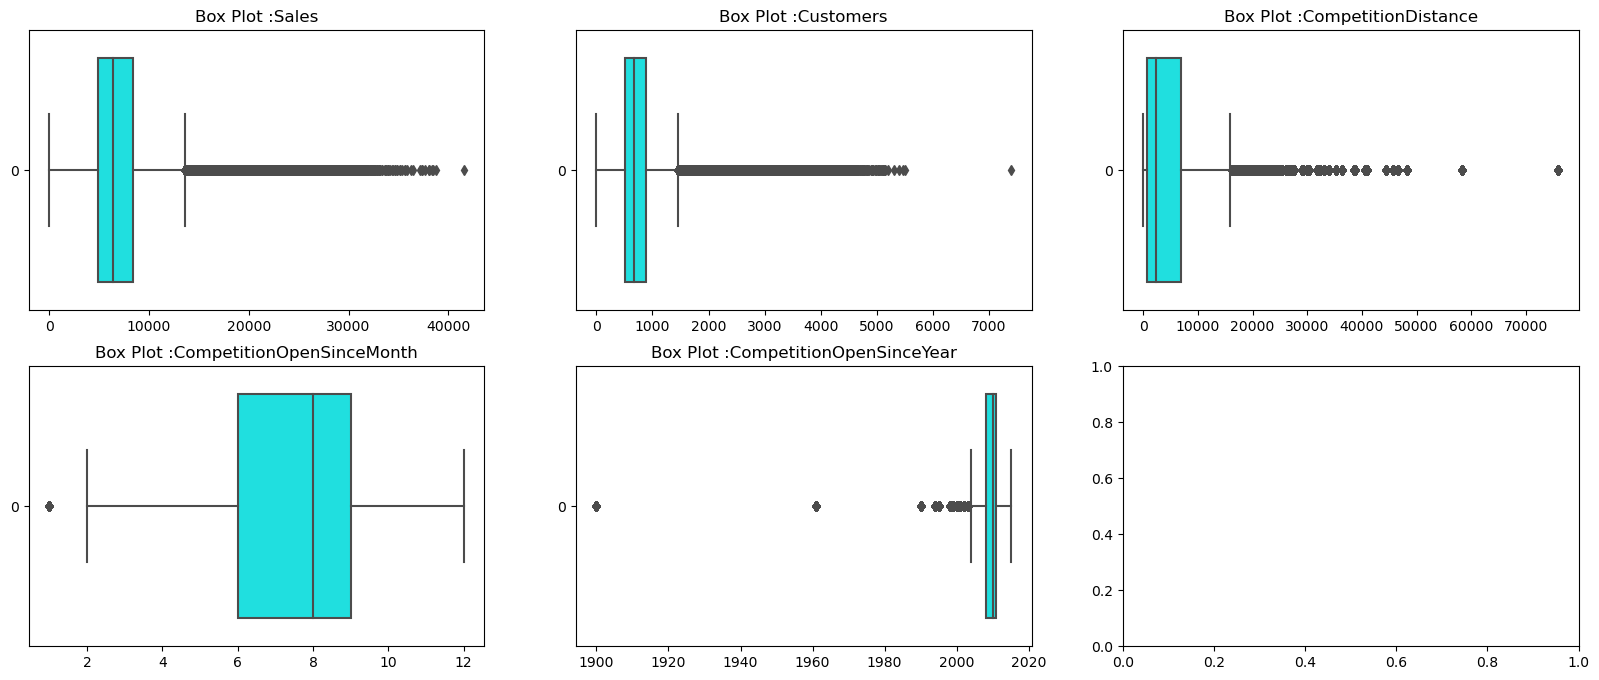

In [226]:
# Visualising Outliers using boxplot

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,8))
for i in range(len(list_outcheck1)):
    plt.subplot(2,3,i+1)
    sns.boxplot(df1_sales_store_open[list_outcheck1[i]], color= colors[0], orient = 'h')
    title = 'Box Plot :' + list_outcheck1[i]
    plt.title(title)
    
plt.savefig('Outliers.jpg')
plt.show()

In [249]:
# Treating outliers
'''Since dropping of the outlier values cause data loss we are creating a floor and ceiling quantile values say q10 and q90 
   and replacing the outiler values with these values at both end'''

# creating a copy of df1_sales_store_open dataset for proceeding with further processing of data before modeling

df_sales_model = df1_sales_store_open.copy()


def treat_outlier(col):
    
    # taking 10,25, 75,90
    q10 = df_sales_model[col].quantile(0.10)
    q25 = df_sales_model[col].quantile(0.25)
    q75 = df_sales_model[col].quantile(0.75)
    q90 = df_sales_model[col].quantile(0.90)
    
    # calculating IQR 
    IQR = q75 - q25
    
    # calculating minimum and max threshold value
    lower_limit = q25 - 1.5 * IQR
    upper_limit = q75 + 1.5 * IQR
    
    # apply capping method
    return df_sales_model[col].apply(lambda x:(q90 if x > upper_limit else q10 if x < lower_limit else x ))
    

for i in list_outcheck1:
    df_sales_model[i] = treat_outlier(i)                                     

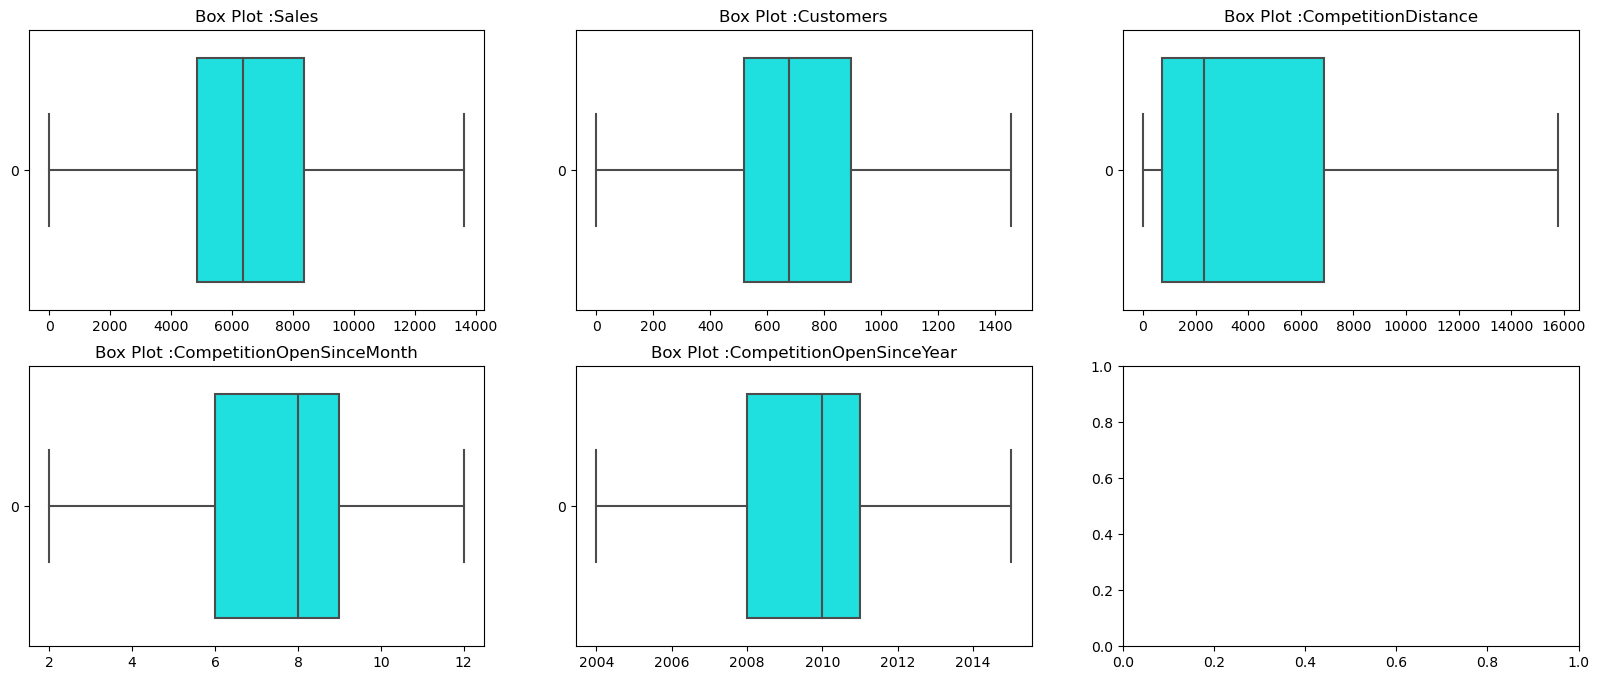

In [250]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,8))
for i in range(len(list_outcheck1)):
    plt.subplot(2,3,i+1)
    sns.boxplot(df_sales_model[list_outcheck1[i]], color= colors[0], orient = 'h')
    title = 'Box Plot :' + list_outcheck1[i]
    plt.title(title)
    
plt.savefig('Outlier_rect.jpg')
plt.show()

### Checking Correlation

In [251]:
df_sales_model.drop(['Open'], axis = 1).corr()    # checking for correlated features

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Day_Year,Month_Year,Year,Week_Year,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Store,1.000000,0.000346,0.003109,0.033198,-0.000012,0.002597,0.000512,0.000087,0.000806,0.000301,0.000756,-0.026963,-0.039697,0.005967,0.007736,0.010857,0.007768
DayOfWeek,0.000346,1.000000,-0.188372,-0.143096,-0.289265,-0.001959,-0.139315,-0.000943,0.005050,0.002102,0.015692,0.001232,0.000428,0.001595,-0.003241,-0.002736,-0.003238
Sales,0.003109,-0.188372,1.000000,0.822959,0.408800,0.008701,0.040898,-0.017533,-0.037973,0.045083,-0.035468,-0.017126,-0.031583,0.040720,-0.115405,-0.045661,-0.115432
Customers,0.033198,-0.143096,0.822959,1.000000,0.249266,0.019910,0.033195,-0.017924,-0.010775,0.002974,-0.009198,-0.192080,-0.033101,0.041219,-0.217400,-0.151499,-0.217362
Promo,-0.000012,-0.289265,0.408800,0.249266,1.000000,0.002165,0.028964,-0.072799,-0.137622,0.023994,-0.123219,-0.000435,-0.000224,-0.000595,-0.000324,-0.000802,-0.000326
StateHoliday,0.002597,-0.001959,0.008701,0.019910,0.002165,1.000000,0.012593,-0.003181,-0.011097,0.002365,-0.010779,0.001780,0.002307,0.000723,-0.010309,-0.010392,-0.010304
SchoolHoliday,0.000512,-0.139315,0.040898,0.033195,0.028964,0.012593,1.000000,0.046218,0.091485,-0.038679,0.053421,-0.003603,-0.000450,-0.000482,-0.008245,-0.008062,-0.008248
Day_Year,0.000087,-0.000943,-0.017533,-0.017924,-0.072799,-0.003181,0.046218,1.000000,-0.103831,-0.028541,-0.049694,0.000178,-0.000025,0.000275,-0.002907,-0.003669,-0.002908
Month_Year,0.000806,0.005050,-0.037973,-0.010775,-0.137622,-0.011097,0.091485,-0.103831,1.000000,-0.167192,0.961615,0.000466,-0.000871,0.000601,-0.014144,-0.017674,-0.014147
Year,0.000301,0.002102,0.045083,0.002974,0.023994,0.002365,-0.038679,-0.028541,-0.167192,1.000000,-0.156922,0.000230,-0.000703,0.000535,-0.005702,-0.006904,-0.005703


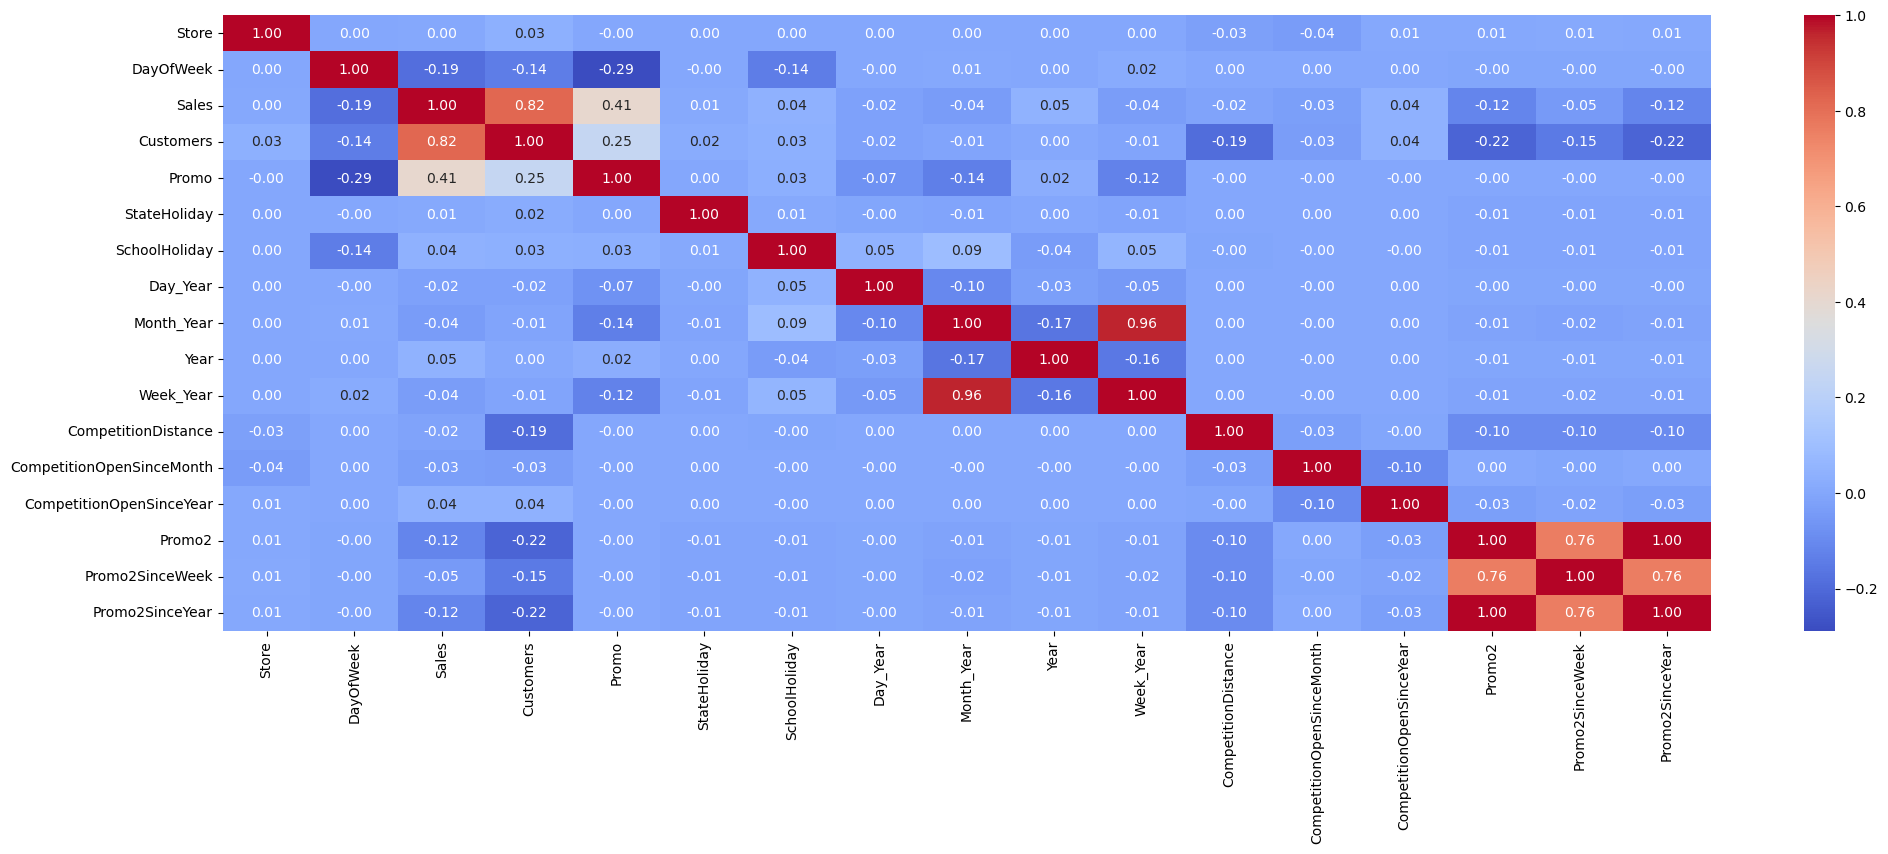

In [252]:
plt.figure(figsize=(24,8))
sns.heatmap(df_sales_model.drop(['Open'], axis=1).corr(), annot=True, cmap='coolwarm',fmt=".2f")

plt.savefig('Corrmat.jpg')
plt.show()

### EDA Summary

- Customers and Sales have a linear relationship, i.e As number of customers increases, sales also increases
- Promo and Sales are related, Sales tends to be higher on those days of the week when promo is running, than other days
- There is no promo on Saturday's and Sunday's, subsequently sales on these days are less compared to other days of the week
- Sales is high during Monday's and Tuesday's
- Sales are not much affected by school holidays
- Storetype 'a' has more sales and customer footfall compared to other stores
- Assortment 'b' is sold only by storetype 'b' and don't have much impact on sales
- Top 5 stores in terms of sales are almost same over the years
- Sales are higher during christmas week, this may be due to celebrations and purchase of items to be given as gifts
- Sales and Customers are normally distributed with a right skew indicating some unusually high values
- Outlier treatment done by replacing outlier values with values at 10th percentile(q10) and 90th percentile(q90)
- Month_Year and Week_Year variables are highly correlated with a correlation of 0.96, Promo2 and Promo2sinceyear are correlated
  with a perfect correlation of 1, Promo2sinceYear and Promo2SinceWeek also has high correlation of 0.76

### Data Pre-processing

### Encoding of Data

In [253]:
''' As the first step here we are converting all the  object datatype variables to numerical format through data encoding'''

salesmodel_enc = df_sales_model.copy()  # Making a copy of the data set to see encoded data and original data separately

object_cols = salesmodel_enc.select_dtypes('object').columns   # Separating columns with data type as object

object_cols

Index(['StoreType', 'Assortment'], dtype='object')

In [254]:
salesmodel_enc = pd.get_dummies(salesmodel_enc, columns = object_cols)  # Encoding categorical variables to numerical

In [255]:
salesmodel_enc.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day_Year,...,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263.0,555.0,1,1,0,1,31,...,0,0.0,0.0,0,0,1,0,1,0,0
1,2,5,2015-07-31,6064.0,625.0,1,1,0,1,31,...,1,13.0,2010.0,1,0,0,0,1,0,0
2,3,5,2015-07-31,8314.0,821.0,1,1,0,1,31,...,1,14.0,2011.0,1,0,0,0,1,0,0
3,4,5,2015-07-31,10771.0,1177.0,1,1,0,1,31,...,0,0.0,0.0,0,0,1,0,0,0,1
4,5,5,2015-07-31,4822.0,559.0,1,1,0,1,31,...,0,0.0,0.0,1,0,0,0,1,0,0


### Feature selection

### Dropping unwanted columns

In [256]:
salesmodel_enc.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Day_Year', 'Month_Year', 'Year',
       'Week_Year', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'StoreType_a', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c'],
      dtype='object')

In [257]:
# Dropping 'Date' column as it is in the datetimeformat, 
#'open' column as there is 0 variance since all the stores in open status for the selected dataset

# based on correlation matrix:
#Month_Year and Weak_Year variables are highly correlated with a correlation of 0.96
# Similarly promo2 and Promo2sinceYear are also correlated with perfect correlation of 1
# Also Promo2 and Promo2since Year are correlated with Promo2since week with a correlation of 0.76
# Hence dropping the variables 'Weak Year' and 'Promo2SinceYear'

salesmodel = salesmodel_enc.drop(['Date','Open','Week_Year','Promo2SinceYear'], axis = 1)
salesmodel.head()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Day_Year,Month_Year,Year,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,5263.0,555.0,1,0,1,31,7,2015,...,2008.0,0,0.0,0,0,1,0,1,0,0
1,2,5,6064.0,625.0,1,0,1,31,7,2015,...,2007.0,1,13.0,1,0,0,0,1,0,0
2,3,5,8314.0,821.0,1,0,1,31,7,2015,...,2006.0,1,14.0,1,0,0,0,1,0,0
3,4,5,10771.0,1177.0,1,0,1,31,7,2015,...,2009.0,0,0.0,0,0,1,0,0,0,1
4,5,5,4822.0,559.0,1,0,1,31,7,2015,...,2015.0,0,0.0,1,0,0,0,1,0,0


### Setting Features and Target Variables

In [258]:
X = salesmodel.drop(['Sales'], axis = 1)      # All values except target variable assigned to X
y = salesmodel.Sales                       # Target Variable assigned to y

In [259]:
X.head()

,Store,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,Day_Year,Month_Year,Year,CompetitionDistance,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,555.0,1,0,1,31,7,2015,1270.0,...,2008.0,0,0.0,0,0,1,0,1,0,0
1,2,5,625.0,1,0,1,31,7,2015,570.0,...,2007.0,1,13.0,1,0,0,0,1,0,0
2,3,5,821.0,1,0,1,31,7,2015,14130.0,...,2006.0,1,14.0,1,0,0,0,1,0,0
3,4,5,1177.0,1,0,1,31,7,2015,620.0,...,2009.0,0,0.0,0,0,1,0,0,0,1
4,5,5,559.0,1,0,1,31,7,2015,15720.0,...,2015.0,0,0.0,1,0,0,0,1,0,0


In [260]:
y.head()

0     5263.0
1     6064.0
2     8314.0
3    10771.0
4     4822.0
Name: Sales, dtype: float64

### Splitting Dataset Into Training Set and Test Set

In [261]:
from sklearn.model_selection import train_test_split    # splitting the data set to 70% trainig and 30% testing data

X_train,X_test1,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

### Displaying  x_test and y_test data in a dataframe

In [263]:
df_xt = pd.DataFrame(X_test1)
df_xt.reset_index(drop = True, inplace = True)
df_xt.head()

,Store,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,Day_Year,Month_Year,Year,CompetitionDistance,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,239,6,463.0,0,0,0,8,2,2014,610.0,...,2010.0,0,0.0,0,0,0,1,0,0,1
1,67,4,867.0,1,0,0,16,5,2013,410.0,...,2006.0,0,0.0,1,0,0,0,0,0,1
2,626,1,621.0,0,0,0,20,4,2015,10740.0,...,2013.0,0,0.0,0,0,1,0,0,0,1
3,618,4,568.0,0,0,0,23,7,2015,9910.0,...,2010.0,0,0.0,0,0,0,1,0,0,1
4,185,1,399.0,0,0,0,24,2,2014,1860.0,...,2015.0,0,0.0,0,0,0,1,0,0,1


In [264]:
df_yt = pd.DataFrame({'Actual_Sales' : y_test})
df_yt.reset_index(drop = True, inplace = True)
df_yt.head()

,Actual_Sales
0,5203.0
1,8590.0
2,6465.0
3,7250.0
4,4339.0


### Standardization

In [76]:
# Transforming data                                 

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test1)

## Model Building

### Linear Regression Model

In [77]:
# Import the libraries
from sklearn.linear_model import LinearRegression

# We now instatiate a Linear Regression object
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [265]:
print(lm.intercept_)

6739.114171829585


In [79]:
print(lm.coef_)

[-3.00491984e+01 -1.08017939e+01  2.19969795e+03  4.71233299e+02
  1.23645964e+00  1.94624773e+01  3.49520210e+01  1.93497888e+01
  1.03446697e+02  2.49084144e+02 -2.36016742e+01 -2.70534884e+01
  1.64246876e+01  1.94100277e+02  2.66160905e+14  7.20008663e+13
  1.81775807e+14  2.46247999e+14 -3.78780390e+14 -7.44854670e+13
 -3.78315027e+14]


In [144]:
coef = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficients'])
coef

,Coefficients
Store,-3.004920e+01
DayOfWeek,-1.080179e+01
Customers,2.199698e+03
Promo,4.712333e+02
StateHoliday,1.236460e+00
SchoolHoliday,1.946248e+01
Day_Year,3.495202e+01
Month_Year,1.934979e+01
Year,1.034467e+02
CompetitionDistance,2.490841e+02


In [81]:
y_train_pred = lm.predict(X_train)

In [82]:
y_test_pred = lm.predict(X_test)

In [266]:
df_yp = pd.DataFrame({'Predicted_Sales' : y_test_pred})
df_yp.head()

,Predicted_Sales
0,4738.112992
1,7943.862992
2,5430.425492
3,6249.550492
4,4354.550492


### Joining X_test, y_test and y_pred values for better visualisation

In [267]:
predictions = pd.concat([df_xt,df_yt, df_yp], axis = 1)
predictions_csv = predictions.to_csv('Predictions.csv')
predictions.head()

,Store,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,Day_Year,Month_Year,Year,CompetitionDistance,...,Promo2SinceWeek,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,Actual_Sales,Predicted_Sales
0,239,6,463.0,0,0,0,8,2,2014,610.0,...,0.0,0,0,0,1,0,0,1,5203.0,4738.112992
1,67,4,867.0,1,0,0,16,5,2013,410.0,...,0.0,1,0,0,0,0,0,1,8590.0,7943.862992
2,626,1,621.0,0,0,0,20,4,2015,10740.0,...,0.0,0,0,1,0,0,0,1,6465.0,5430.425492
3,618,4,568.0,0,0,0,23,7,2015,9910.0,...,0.0,0,0,0,1,0,0,1,7250.0,6249.550492
4,185,1,399.0,0,0,0,24,2,2014,1860.0,...,0.0,0,0,0,1,0,0,1,4339.0,4354.550492


### Evaluating the model

In [85]:
train_score = lm.score(X_train, y_train)           
train_score

0.7986407970978744

In [86]:
test_score = lm.score(X_test, y_test)
test_score

0.7972470858517199

### Evaluation metrics

In [87]:
from sklearn import metrics

In [88]:
# Mean Absolute Error (MAE)

MAE = metrics.mean_absolute_error(y_test, y_test_pred)
MAE

862.2434341524075

In [89]:
# Mean Squared Error (MSE)

MSE = metrics.mean_squared_error(y_test, y_test_pred)
MSE

1267608.1398961006

In [90]:
#Root Mean Squared Error(RMSE)

RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
RMSE

1125.881050509378

In [268]:
# Displaying Training and Testing Accuracy

from sklearn.metrics import r2_score

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.7986407970978744
0.7972470858517199


### Visualising Actual Vs predicted sales for test data

In [269]:
columns = predictions.columns
list_col = columns[ :21]
data_vis = predictions.head(100)

<Figure size 640x480 with 0 Axes>

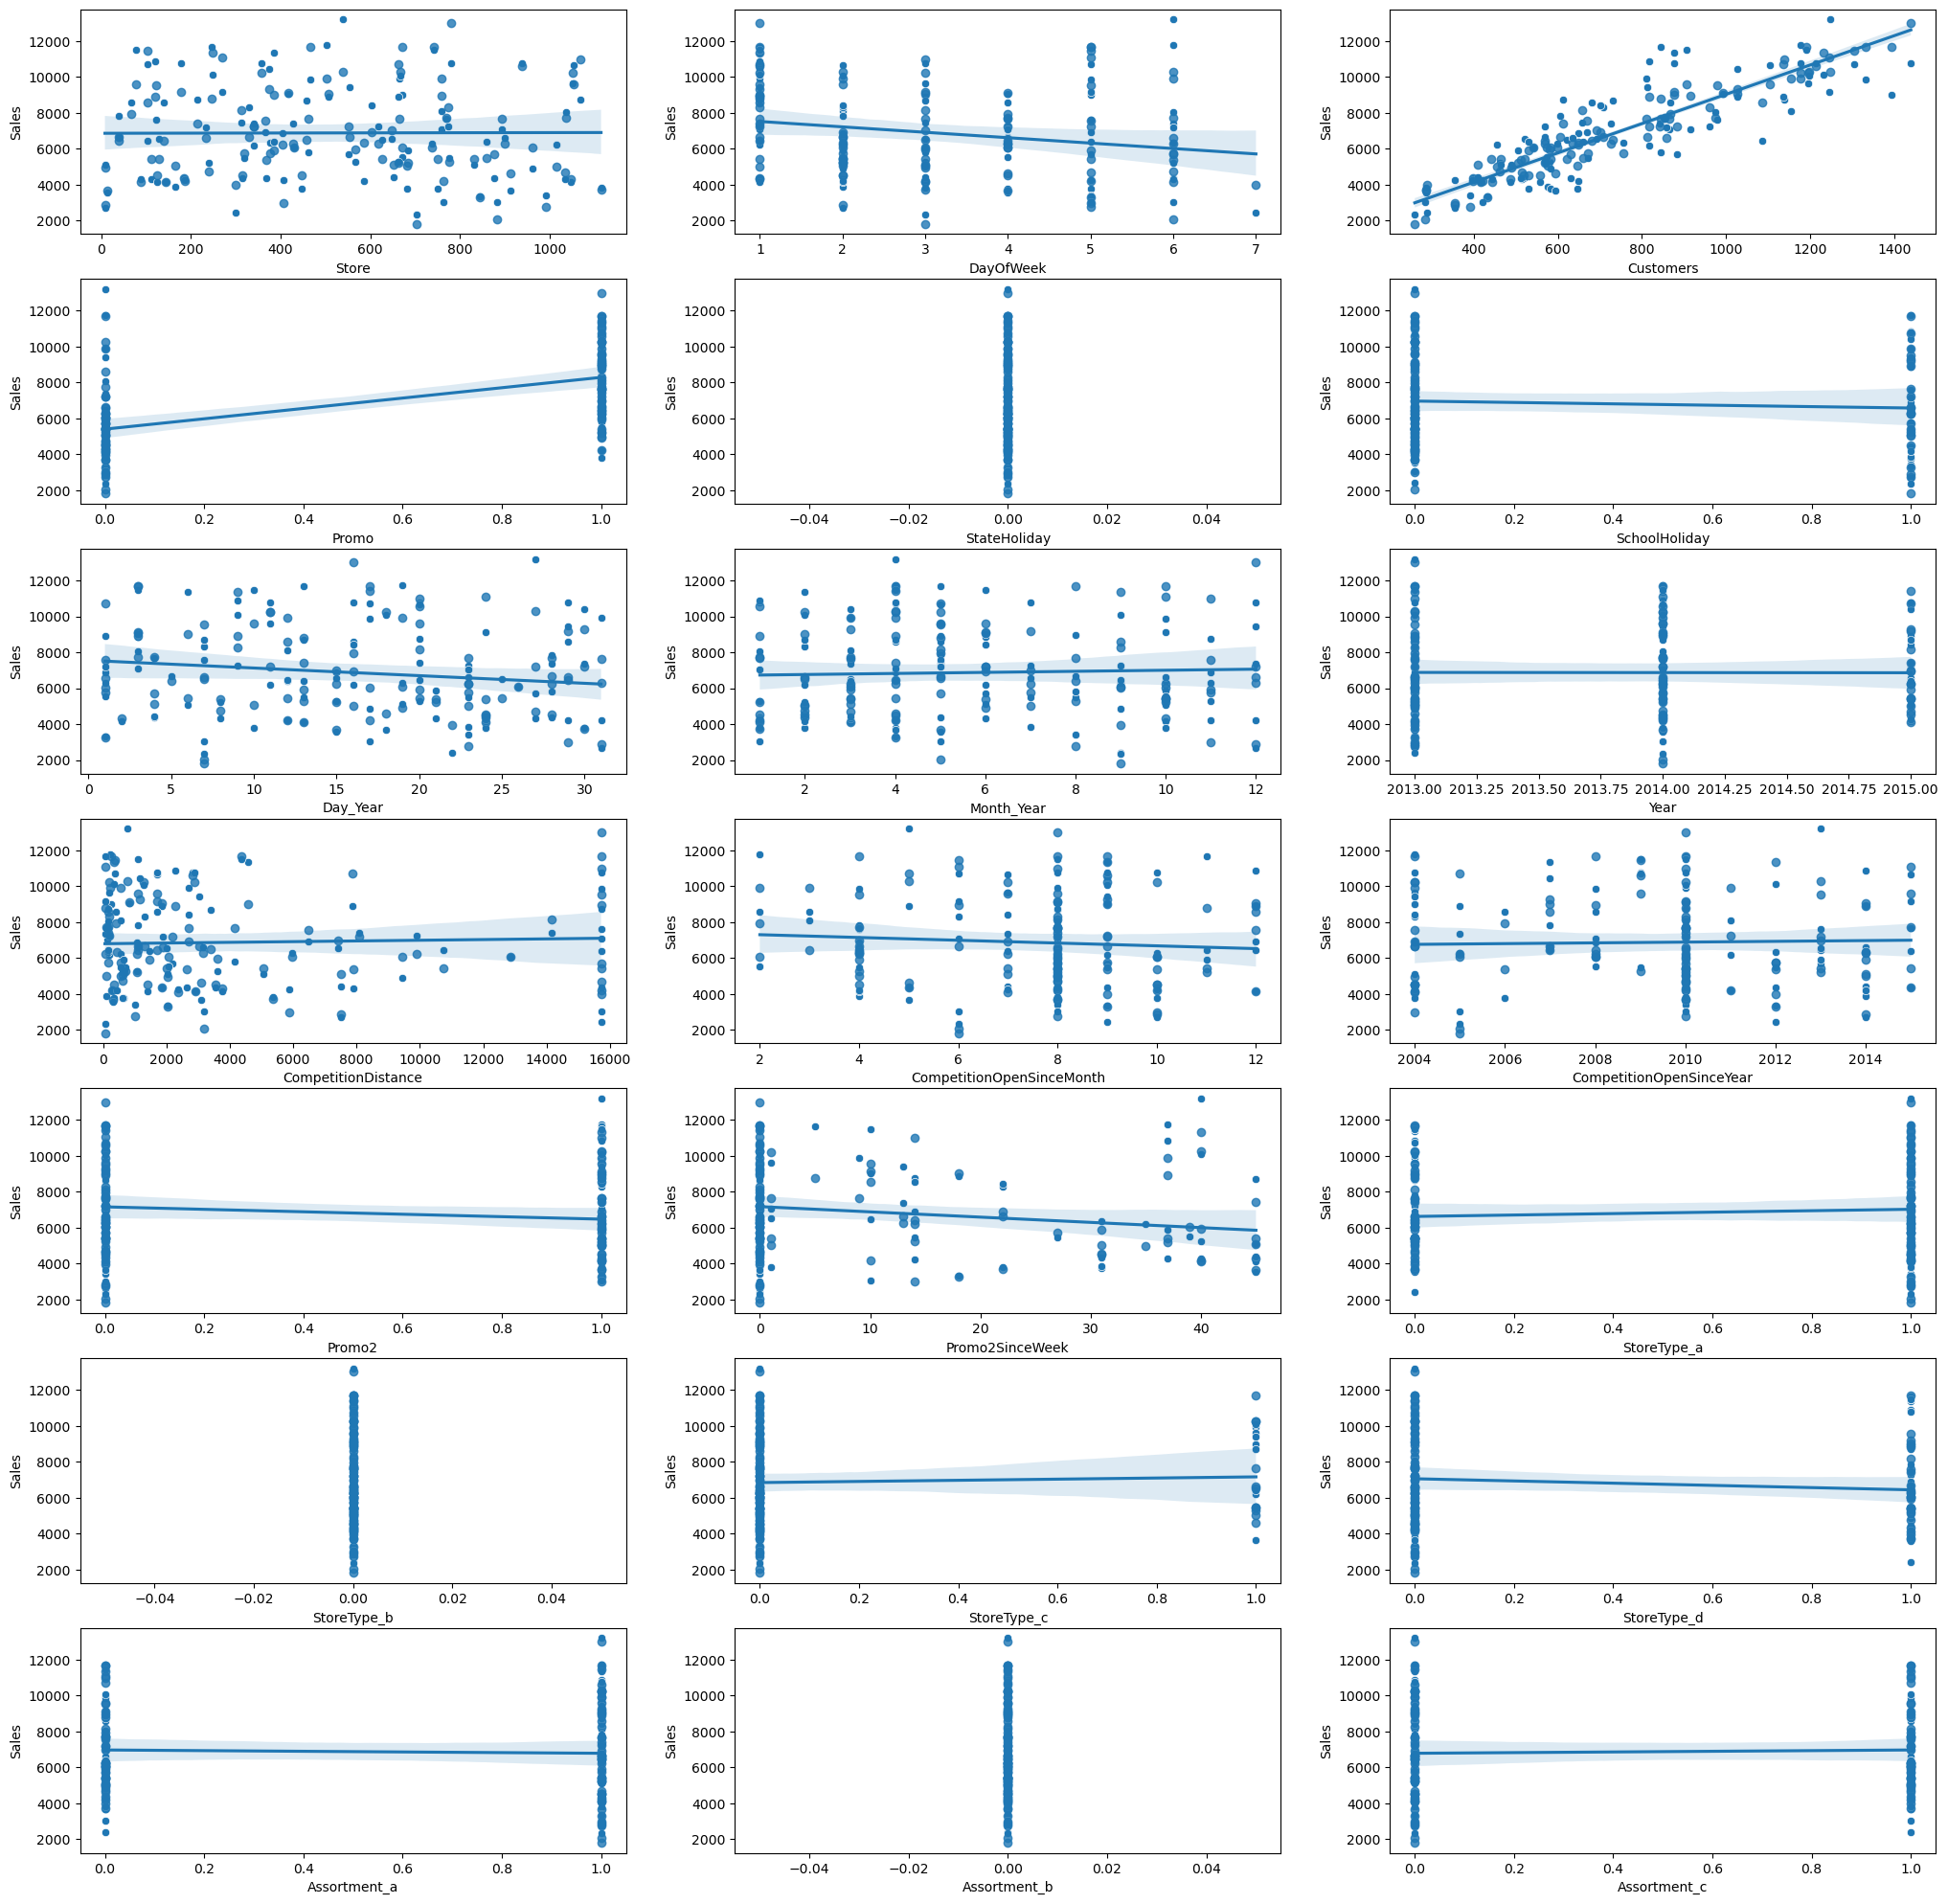

In [271]:
plt.rcParams.update(plt.rcParamsDefault)        # Selecting the first 100 rows of actual and Predicted values for visualization
%matplotlib inline

plt.suptitle("Actual Vs Predicted sales for Test data ",size = 30)
fig, ax = plt.subplots(nrows=7, ncols=3, figsize=(25,25))
for i in range(len(list_col)):
    plt.subplot(7,3,i+1)
    sns.scatterplot(data = data_vis, x = list_col[i], y = 'Actual_Sales', palette = 'cool')
    sns.regplot( x = data_vis[list_col[i]], y= data_vis['Predicted_Sales'],)
    plt.xlabel(f'{list_col[i]}')
    plt.ylabel('Sales')
    
plt.savefig('Test_data.jpg')
plt.show()

- Inference :
  - Variables Customers and Promo has the highest impact on predictions
  - Variables like StoreType_b, Assortment_b,StateHoliday has least/negligible impact on predictions

### Visualising the regression model

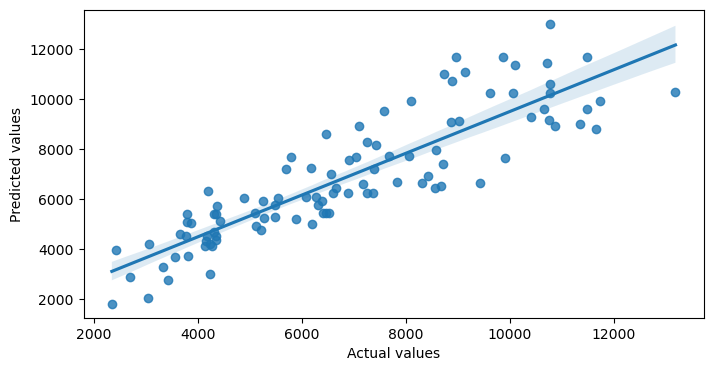

In [272]:
plt.rcParams.update(plt.rcParamsDefault)        # Selecting the first 100 rows of actual and Predicted values for visualization
%matplotlib inline
plt.figure(figsize=(8,4))
sns.regplot(x = y_test[ :100] , y = y_test_pred[ :100])
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig('regression.jpg')
plt.show()

### Interpretation using stats model

In [273]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr.fit()

In [274]:
lr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                 1.234e+05
Date:                Sat, 15 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:21:22   Log-Likelihood:            -4.9906e+06
No. Observations:              591074   AIC:                         9.981e+06
Df Residuals:                  591054   BIC:                         9.982e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -1.581e+05   2508.866    -63.030      0.000   -1.63e+05   -1.53e+05
Store                        -0.0935      0.005    -20.487      0.000      -0.102      -0.085
DayOfWeek                    -6.3012      0.899     -7.005      0.000      -8.064      -4.538
Customers                     8.1996      0.006   1299.715      0.000       8.187       8.212
Promo                       947.9026      3.215    294.882      0.000     941.602     954.203
StateHoliday                 38.9625     44.477      0.876      0.381     -48.211     126.136
SchoolHoliday                49.1853      3.762     13.074      0.000      41.812      56.559
Day_Year                      3.8824      0.164     23.604      0.000       3.560       4.205
Month_Year                    5.7186      0.449     12.725      0.000       4.838       6.599
Year                        133.0850      1.910     69.688      0.000     129.342     136.828
CompetitionDistance           0.0487      0.000    160.029      0.000       0.048       0.049
CompetitionOpenSinceMonth    -9.0114      0.562    -16.043      0.000     -10.112      -7.910
CompetitionOpenSinceYear     -9.0661      0.494    -18.338      0.000     -10.035      -8.097
Promo2                       32.7663      4.591      7.138      0.000      23.769      41.764
Promo2SinceWeek              12.6755      0.147     85.990      0.000      12.387      12.964
StoreType_a               -3.976e+04    627.213    -63.393      0.000    -4.1e+04   -3.85e+04
StoreType_b               -3.977e+04    627.404    -63.394      0.000    -4.1e+04   -3.85e+04
StoreType_c               -3.991e+04    627.181    -63.641      0.000   -4.11e+04   -3.87e+04
StoreType_d               -3.868e+04    627.237    -61.674      0.000   -3.99e+04   -3.75e+04
Assortment_a              -5.227e+04    836.357    -62.502      0.000   -5.39e+04   -5.06e+04
Assortment_b              -5.387e+04    836.270    -64.415      0.000   -5.55e+04   -5.22e+04
Assortment_c              -5.199e+04    836.428    -62.158      0.000   -5.36e+04   -5.04e+04
==============================================================================
Omnibus:                    25231.422   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45085.966
Skew:                           0.348   Prob(JB):                         0.00
Kurtosis:                       4.161   Cond. No.                     3.31e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.79e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [156]:
X_test_sm = sm.add_constant(X_test)
model = lr.fit()
predictions = model.predict(X_test_sm)
predictions

array([ 4738.5223531 ,  7946.6603343 ,  5428.47805021, ...,
       11263.46600596,  8134.36621495,  4621.61657126])

### Regression Model Summary

In [189]:
RM_summary = pd.DataFrame({'Evaluation_Params' : [train_score,test_score,MAE,MSE, RMSE,0.799,0.799]}, 
                          index = ['Train_score','Test_Score','Mean_Absolute_Error','Mean_Squared_Error','Root_Mean_Squared_Error','R_Squared','Adjusted_R_Squared'])

In [197]:
RM_summary['Evaluation_Params'] = RM_summary['Evaluation_Params'].round(2)

In [198]:
RM_summary

,Evaluation_Params
Train_score,0.80
Test_Score,0.80
Mean_Absolute_Error,865.68
Mean_Squared_Error,1277994.62
Root_Mean_Squared_Error,1125.88
R_Squared,0.80
Adjusted_R_Squared,0.80


### Conclusion :

- The model returned good training and testing accuracy and good R squared and Adjusted R squared value
- However the MSE value is high